# Practical example

## Importing the relevant libraries

In [987]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [988]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [989]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,nan,6,nan,nan,4,2,nan,312
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan,E-Class
freq,936,nan,1649,nan,nan,2019,3947,nan,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Determining the variables of interest

In [990]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,936,nan,1649,nan,nan,2019,3947,nan
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Dealing with missing values

In [991]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [992]:
data_no_mv = data.dropna(axis=0)

In [993]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,880,nan,1534,nan,nan,1861,3654,nan
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Exploring the PDFs

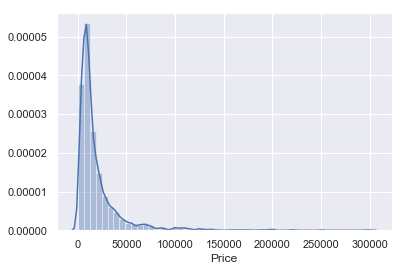

In [994]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [995]:
# Mine - seems the best, taking it a bit up or a bit down doesn't make a difference
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,880,nan,1528,nan,nan,1853,3613,nan
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00


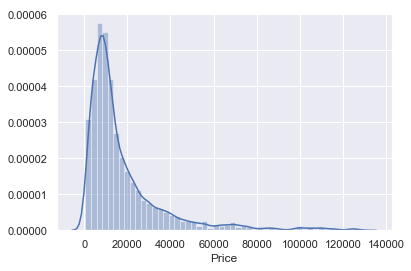

In [996]:
sns.distplot(data_1['Price'])

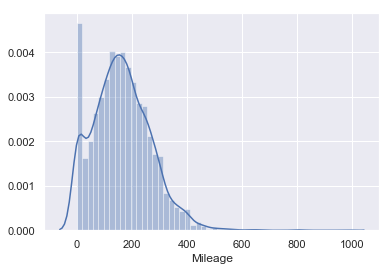

In [997]:
sns.distplot(data_no_mv['Mileage'])

In [998]:
# Mine - didn't change anything, seems the best
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

# Mine - DIDN'T HELP - was added to get rid of 0 mileage which is actually the most expensive
#q = data_2['Mileage'].quantile(0.001)
#data_2 = data_2[data_2['Mileage']>q]

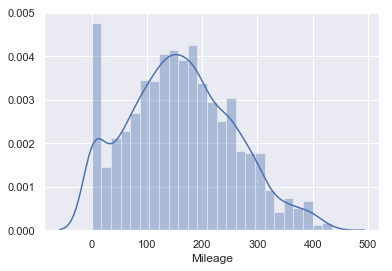

In [999]:
sns.distplot(data_2['Mileage'])

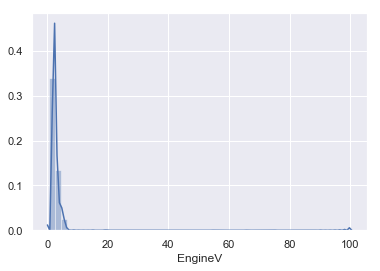

In [1000]:
sns.distplot(data_no_mv['EngineV'])

In [1001]:
data_3 = data_2[data_2['EngineV']<6.5]

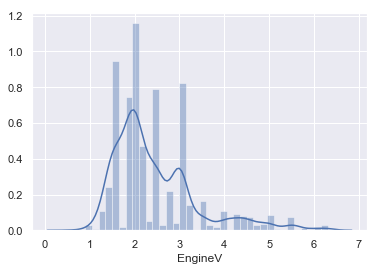

In [1002]:
sns.distplot(data_3['EngineV'])

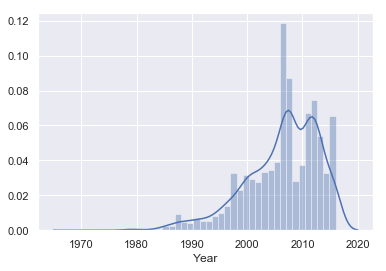

In [1003]:
sns.distplot(data_no_mv['Year'])

In [1004]:
#mine - was 0.01, 0.04 seems better
q = data_3['Year'].quantile(0.04)
data_4 = data_3[data_3['Year']>q]

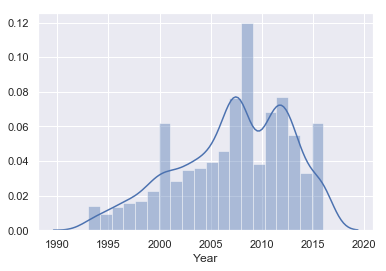

In [1005]:
sns.distplot(data_4['Year'])

In [1006]:
data_cleaned = data_4.reset_index(drop=True)

In [1007]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3759,3759.00,3759,3759.00,3759.00,3759,3759,3759.00
unique,7,nan,6,nan,nan,4,2,nan
top,Volkswagen,nan,sedan,nan,nan,Diesel,yes,nan
freq,822,nan,1391,nan,nan,1788,3402,nan
mean,NaN,18623.03,NaN,157.50,2.46,NaN,NaN,2007.19
std,NaN,19186.49,NaN,92.86,0.96,NaN,NaN,5.49
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1993.00
25%,NaN,7500.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11950.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,22000.00,NaN,220.00,3.00,NaN,NaN,2012.00


## Checking the OLS assumptions

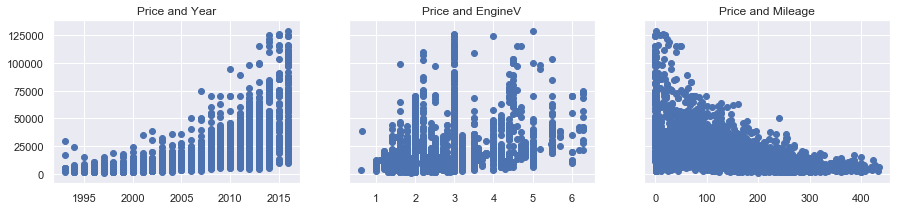

In [1008]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

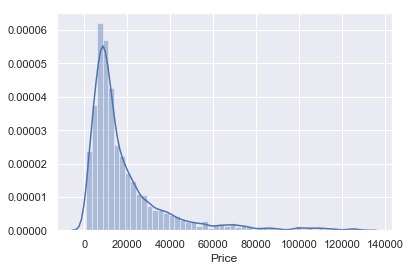

In [1009]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [1010]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
1,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
2,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
3,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
4,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,9.56
5,Renault,10799.00,vagon,193,1.50,Diesel,yes,2012,9.29
6,Volkswagen,1400.00,other,212,1.80,Gas,no,1999,7.24
7,Renault,11950.00,vagon,177,1.50,Diesel,yes,2011,9.39
8,Renault,2500.00,sedan,260,1.79,Petrol,yes,1994,7.82
9,Audi,9500.00,vagon,165,2.70,Gas,yes,2003,9.16


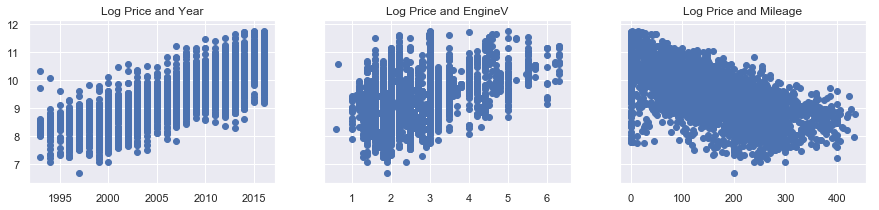

In [1011]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [1012]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [1013]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [1014]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [1015]:
vif

,VIF,features
0,3.85,Mileage
1,10.28,Year
2,7.60,EngineV


In [1016]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [1017]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [1018]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.70,9.56,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Rearrange a bit

In [1019]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [1020]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [1021]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.97,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.56,200,2.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## Linear regression model

### Declare the inputs and the targets

In [1022]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [1023]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [1024]:
inputs_scaled = scaler.transform(inputs)

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


### Train Test Split

In [1025]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [1026]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1027]:
y_hat = reg.predict(x_train)

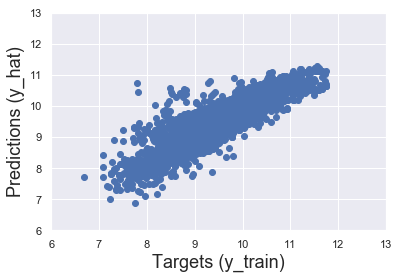

In [1028]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

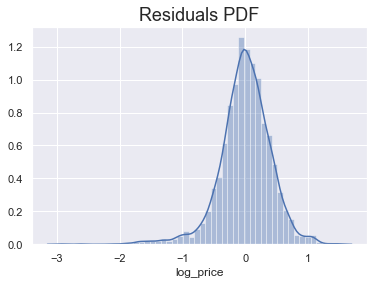

In [1029]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [1030]:
reg.score(x_train,y_train)

0.7711412934112184

### Finding the weights and bias

In [1031]:
reg.intercept_

9.451808346020217

In [1032]:
reg.coef_

array([-0.4452052 ,  0.20402126,  0.01591373,  0.01196624, -0.14386552,
       -0.19222435, -0.06669131, -0.09741578, -0.14126989, -0.09806861,
       -0.18407732, -0.122636  , -0.16217375, -0.11076916, -0.02635436,
       -0.14545082,  0.32907146])

In [1033]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.45
1,EngineV,0.20
2,Brand_BMW,0.02
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.19
6,Brand_Toyota,-0.07
7,Brand_Volkswagen,-0.10
8,Body_hatch,-0.14
9,Body_other,-0.10


In [1034]:
data_cleaned['Brand'].unique()

array(['Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW',
       'Mitsubishi'], dtype=object)

## Testing

In [1035]:
y_hat_test = reg.predict(x_test)

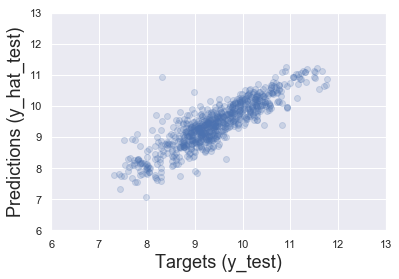

In [1036]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [1037]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,7561.92
1,12589.79
2,7418.60
3,36423.83
4,6406.83


In [1038]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,7561.92,nan
1,12589.79,nan
2,7418.60,nan
3,36423.83,nan
4,6406.83,nan
5,15779.41,10799.00
6,6854.15,nan
7,8457.42,nan
8,22645.95,2500.00
9,13182.64,nan


In [1039]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    8.95
1    8.75
2    9.46
3   10.13
4    8.92
Name: log_price, dtype: float64

In [1040]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,7561.92,7700.00
1,12589.79,6300.00
2,7418.60,12850.00
3,36423.83,25000.00
4,6406.83,7500.00
5,15779.41,9400.00
6,6854.15,4500.00
7,8457.42,4700.00
8,22645.95,28500.00
9,13182.64,12650.00


In [1041]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [1042]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,7561.92,7700.00,138.08,1.79
1,12589.79,6300.00,-6289.79,99.84
2,7418.60,12850.00,5431.40,42.27
3,36423.83,25000.00,-11423.83,45.70
4,6406.83,7500.00,1093.17,14.58
5,15779.41,9400.00,-6379.41,67.87
6,6854.15,4500.00,-2354.15,52.31
7,8457.42,4700.00,-3757.42,79.95
8,22645.95,28500.00,5854.05,20.54
9,13182.64,12650.00,-532.64,4.21


In [1043]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,752.00,752.00,752.00,752.00
mean,15978.52,17702.73,1724.21,33.23
std,12649.91,17724.20,9562.10,56.97
min,1187.40,1499.00,-50682.83,0.24
25%,7481.33,7500.00,-2146.28,11.47
50%,12220.17,11825.00,198.96,23.74
75%,20742.88,21925.00,3596.34,38.86
max,76326.90,129222.00,83184.86,1236.17


In [1044]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
312,8778.93,8800.00,21.07,0.24
389,17249.05,17200.00,-49.05,0.29
259,10967.53,11000.00,32.47,0.30
526,5868.27,5850.00,-18.27,0.31
207,23742.47,23660.00,-82.47,0.35
318,9462.96,9500.00,37.04,0.39
62,17582.96,17500.00,-82.96,0.47
384,7165.37,7200.00,34.63,0.48
396,29039.77,28900.00,-139.77,0.48
710,18102.53,18200.00,97.47,0.54
